#### imports

In [1]:
from keras.preprocessing.text import Tokenizer, text_to_word_sequence

Using TensorFlow backend.


In [2]:
# utility function to sentence(word seq.) to char seq(space is treated as special characted)
SPACE = "_SPACE_"
def char_seq(sentence) :
    char_seq_output = ""
    for c in sentence:
        char_seq_output += " "
        if c == " ":
            char_seq_output += SPACE
        else:
            char_seq_output += c
    return char_seq_output.lstrip(' ')

In [3]:
list(map(char_seq, ["abcd uvwxyz", "123 987"]))

['a b c d _SPACE_ u v w x y z', '1 2 3 _SPACE_ 9 8 7']

In [4]:
# pre process the input data : alice.en
with open('./data/alice.en') as f:
    input_lines = f.read().splitlines()
    input_lines_cs = list(map(char_seq, input_lines))
print('no. of lines {}'.format(len(input_lines)))
# tokenizer which makes the text lower case and split by space
en_tokenizer = Tokenizer(lower=True, split=" ", filters='')
en_tokenizer.fit_on_texts(input_lines_cs)

# vocabulary:
print(en_tokenizer.word_index)

# get sequences
input_seqs = en_tokenizer.texts_to_sequences(input_lines_cs)
print('sample seq:')
for i, (line, seq) in enumerate(zip(input_lines[:2], input_seqs[:2])):
    print('  line {}:'.format(i + 1))
    print('    text  > {}'.format(line))
    print('    seq   > {}'.format(seq))


no. of lines 2791
{'_space_': 1, 'e': 2, 't': 3, 'a': 4, 'o': 5, 'i': 6, 'n': 7, 'h': 8, 's': 9, 'r': 10, 'd': 11, 'l': 12, 'u': 13, 'c': 14, 'w': 15, 'g': 16, 'y': 17, ',': 18, 'm': 19, 'f': 20, 'p': 21, '’': 22, 'b': 23, 'k': 24, '.': 25, '‘': 26, 'v': 27, '-': 28, '!': 29, ':': 30, 'j': 31, 'q': 32, '?': 33, ';': 34, 'x': 35, '*': 36, 'z': 37, ')': 38, '“': 39, '(': 40, '1': 41, '”': 42, '/': 43, '0': 44, '5': 45, '3': 46, '2': 47, '8': 48, '9': 49, '4': 50, '6': 51, '[': 52, '7': 53, '_': 54, ']': 55, '@': 56, '$': 57, '#': 58, '%': 59}
sample seq:
  line 1:
    text  > project gutenberg’s alice’s adventures in wonderland , by lewis carroll
    seq   > [21, 10, 5, 31, 2, 14, 3, 1, 16, 13, 3, 2, 7, 23, 2, 10, 16, 22, 9, 1, 4, 12, 6, 14, 2, 22, 9, 1, 4, 11, 27, 2, 7, 3, 13, 10, 2, 9, 1, 6, 7, 1, 15, 5, 7, 11, 2, 10, 12, 4, 7, 11, 1, 18, 1, 23, 17, 1, 12, 2, 15, 6, 9, 1, 14, 4, 10, 10, 5, 12, 12]
  line 2:
    text  > this ebook is for the use of anyone anywhere at no cost and with
  

In [5]:
len(en_tokenizer.word_index)
type(input_seqs[0])

list

In [6]:
# pre process the output data : alice.x
with open('./data/alice.x') as f:
    output_lines = f.read().splitlines()
    output_lines_cs = list(map(char_seq, output_lines))
print('no. of lines {}'.format(len(output_lines)))
# tokenizer which makes the text lower case and split by space
x_tokenizer = Tokenizer(lower=True, split=" ", filters='')
x_tokenizer.fit_on_texts(output_lines_cs)

# vocabulary:
print('vocabulary size: {}'.format(len(x_tokenizer.word_index)))
print('vocabulary: {}'.format(x_tokenizer.word_index))

# get sequences
output_seqs = x_tokenizer.texts_to_sequences(output_lines_cs)
print('sample seq:')
for i, (line, seq) in enumerate(zip(output_lines[:2], output_seqs[:2])):
    print('  line {}:'.format(i + 1))
    print('    text  > {}'.format(line))
    print('    seq   > {}'.format(seq))


no. of lines 2791
vocabulary size: 59
vocabulary: {'_space_': 1, '5': 2, 'x': 3, '4': 4, 'w': 5, 'f': 6, '?': 7, ']': 8, 'u': 9, 'c': 10, 't': 11, '-': 12, '6': 13, '7': 14, 'r': 15, '’': 16, '[': 17, '$': 18, ':': 19, ';': 20, 's': 21, '”': 22, 'e': 23, '!': 24, 'q': 25, '_': 26, '/': 27, '1': 28, '#': 29, 'p': 30, '%': 31, 'v': 32, 'k': 33, '9': 34, '“': 35, 'b': 36, '‘': 37, 'd': 38, '8': 39, 'z': 40, 'y': 41, ')': 42, '2': 43, '(': 44, '3': 45, 'l': 46, 'h': 47, 'g': 48, 'o': 49, 'j': 50, ',': 51, 'm': 52, '0': 53, '.': 54, '@': 55, '*': 56, 'n': 57, 'i': 58, 'a': 59}
sample seq:
  line 1:
    text  > scw%57x ’6x5?e5c’”u 4-f75”u 4t/5?x6c5u f? rw?t5c-4?t $ e[ -5rfu 74ccw--
    seq   > [21, 10, 5, 31, 2, 14, 3, 1, 16, 13, 3, 2, 7, 23, 2, 10, 16, 22, 9, 1, 4, 12, 6, 14, 2, 22, 9, 1, 4, 11, 27, 2, 7, 3, 13, 10, 2, 9, 1, 6, 7, 1, 15, 5, 7, 11, 2, 10, 12, 4, 7, 11, 1, 18, 1, 23, 17, 1, 12, 2, 15, 6, 9, 1, 14, 4, 10, 10, 5, 12, 12]
  line 2:
    text  > x]fu 5eww! fu ;wc x]5 6u5 w; 4?[w?5

In [7]:
import numpy as np
import tensorflow as tf
import helpers

tf.reset_default_graph()
sess = tf.InteractiveSession()

In [8]:
tf.__version__

'1.2.0'

In [9]:
PAD = 0
EOS = 1 # this is not being used

vocab_size = len(en_tokenizer.word_index) + 1
input_embedding_size = 16 # 20 or 32

encoder_hidden_units = 20
decoder_hidden_units = encoder_hidden_units

In [10]:
# placeholders for encoder inputs, decoder input and decoder targets
# we don't define the shape (size) of encoder inputs / decoder targets as it will depend on batch size
encoder_inputs = tf.placeholder(shape=(None, None), dtype=tf.int32, name='encoder_inputs')
decoder_targets = tf.placeholder(shape=(None, None), dtype=tf.int32, name='decoder_targets')
# similarly decoder inputs' shape (size) is dynamic - batch dependent
decoder_inputs = tf.placeholder(shape=(None, None), dtype=tf.int32, name='decoder_inputs')
# ^^^ gets map to previous decoder output during rollout - but during training we want to 
#   input the target inspite of whatever the decoder output is

In [11]:
# random initialization of embedding
# word embedding help us reduce the dimension of data for network training
embeddings = tf.Variable(tf.random_uniform([vocab_size, input_embedding_size], -1.0, 1.0), dtype=tf.float32)

In [12]:
# need to understand how this embedding look up works ??
encoder_inputs_embedded = tf.nn.embedding_lookup(embeddings, encoder_inputs)
decoder_inputs_embedded = tf.nn.embedding_lookup(embeddings, decoder_inputs)

In [13]:
# define encoder cell - using an LSTMCell
encoder_cell = tf.contrib.rnn.LSTMCell(encoder_hidden_units)
# defined attention length randomnly - need to analysis the input data and maybe define based on that
attention_length = 10 
# add a attention wrapper around encoder cell
encoder_cell_w_attention = tf.contrib.rnn.AttentionCellWrapper(encoder_cell, attention_length, state_is_tuple=True)
# define encoder rnn
encoder_outputs, encoder_final_state = tf.nn.dynamic_rnn(
    encoder_cell_w_attention, encoder_inputs_embedded,
    dtype=tf.float32, time_major=True,
)

del encoder_outputs

In [14]:
# define decoder cell - using an LSTMCell
decoder_cell = tf.contrib.rnn.LSTMCell(decoder_hidden_units)
decoder_cell_attn = tf.contrib.rnn.AttentionCellWrapper(decoder_cell, attention_length, state_is_tuple=True)
# define decoder RNN
decoder_outputs, decoder_final_state = tf.nn.dynamic_rnn(
    decoder_cell_attn, decoder_inputs_embedded,
    initial_state=encoder_final_state,
    dtype=tf.float32, time_major=True, scope="plain_decoder",
)

In [15]:
decoder_logits = tf.contrib.layers.linear(decoder_outputs, vocab_size)

decoder_prediction = tf.argmax(decoder_logits, 2)

In [16]:
stepwise_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(
    labels=tf.one_hot(decoder_targets, depth=vocab_size, dtype=tf.float32),
    logits=decoder_logits,
)

loss = tf.reduce_mean(stepwise_cross_entropy)
train_op = tf.train.AdamOptimizer().minimize(loss)


In [17]:
sess.run(tf.global_variables_initializer())

In [18]:
# get batch data
def next_feed(batch_seq, input_seqs, output_seqs, batch_size):
    start = batch_seq * batch_size
    end = (batch_seq + 1) * batch_size
    batch_ = input_seqs[start:end]
    #print(batch_)
    dbatch_ = output_seqs[start:end]
    #print(batch_)
    encoder_inputs_, _ = helpers.batch(batch_)
    decoder_targets_, _ = helpers.batch(dbatch_)
    decoder_inputs_, _ = helpers.batch(dbatch_)
    return {
        encoder_inputs: encoder_inputs_,
        decoder_inputs: decoder_inputs_,
        decoder_targets: decoder_targets_,
    }

In [19]:
loss_track = []
batch_size = 10
max_batches = 200
batches_in_epoch = 199
training_data_size = max_batches * batch_size # 2000

## get the validation data
vd_batch_size = 200
vd = next_feed(0, input_seqs[training_data_size:], output_seqs[training_data_size:], vd_batch_size)
print(vd[encoder_inputs].shape)
vd_loss_track = []

(78, 200)


In [20]:
writer = tf.summary.FileWriter('logs', sess.graph)

try:
    for epoch in range(15):
        print('==> epoch {}:'.format(epoch + 1))
        for batch in range(max_batches):
            fd = next_feed(batch, input_seqs, output_seqs, batch_size)
            _, l = sess.run([train_op, loss], fd)
            loss_track.append(l)
            #calculate validation loss
            vl = sess.run(loss, vd)
            vd_loss_track.append(vl)

            if batch == 0 or batch % batches_in_epoch == 0:
                print('batch {}'.format(batch))
                print('  minibatch loss: {}'.format(sess.run(loss, fd)))
                predict_ = sess.run(decoder_prediction, fd)
                for i, (inp, pred) in enumerate(zip(fd[encoder_inputs].T, predict_.T)):
                    print('  sample {}:'.format(i + 1))
                    print('    input     > {}'.format(inp))
                    print('    predicted > {}'.format(pred))
                    if i >= 2:
                        break
                print()
except KeyboardInterrupt:
    print('training interrupted')

writer.close()

==> epoch 1:
batch 0
  minibatch loss: 4.028650760650635
  sample 1:
    input     > [21 10  5 31  2 14  3  1 16 13  3  2  7 23  2 10 16 22  9  1  4 12  6 14  2
 22  9  1  4 11 27  2  7  3 13 10  2  9  1  6  7  1 15  5  7 11  2 10 12  4
  7 11  1 18  1 23 17  1 12  2 15  6  9  1 14  4 10 10  5 12 12]
    predicted > [32 51 45 45  8 55 55 53 18  8  8  8 50 33 33 33 44 37  3  3 12 12 12 23 23
 56 47  4 29 29 29 58  4 16 16 16 16 16 16 56 47 16 24 24 59 59 59 59 59 47
 47 59  4 31  4 31 47  4  4  4 58 29 29  4 29 29 29 29 29 29 29]
  sample 2:
    input     > [ 3  8  6  9  1  2 23  5  5 24  1  6  9  1 20  5 10  1  3  8  2  1 13  9  2
  1  5 20  1  4  7 17  5  7  2  1  4  7 17 15  8  2 10  2  1  4  3  1  7  5
  1 14  5  9  3  1  4  7 11  1 15  6  3  8  0  0  0  0  0  0  0]
    predicted > [41 41 41 13 13  8 41 37 45 45 45 12 33 12  7  7 12  7  7  7  7  7  7  7  7
  7  7  7  7 56 56 29 29 47 47 29 56 47 47 58 58 58 58 58 58 58 58 58  4  4
  4 58 58 58 58  6 58  4 58  4 58 23 23 45 45 56 59 

batch 0
  minibatch loss: 0.6628900170326233
  sample 1:
    input     > [21 10  5 31  2 14  3  1 16 13  3  2  7 23  2 10 16 22  9  1  4 12  6 14  2
 22  9  1  4 11 27  2  7  3 13 10  2  9  1  6  7  1 15  5  7 11  2 10 12  4
  7 11  1 18  1 23 17  1 12  2 15  6  9  1 14  4 10 10  5 12 12]
    predicted > [26 10  5 13  2 14  3  1 16 13  3  2  7 11  2 10 16 22  9  1  4 12  6 14  2
 22  9  1  4 11 16  2  7  3 13 10  2  9  1  6  7  1 15  5  7 11  2 10 12  4
  7 11  1 18  1 11 17  1 12  2 15  6  9  1 14  4 10 10  5 12 12]
  sample 2:
    input     > [ 3  8  6  9  1  2 23  5  5 24  1  6  9  1 20  5 10  1  3  8  2  1 13  9  2
  1  5 20  1  4  7 17  5  7  2  1  4  7 17 15  8  2 10  2  1  4  3  1  7  5
  1 14  5  9  3  1  4  7 11  1 15  6  3  8  0  0  0  0  0  0  0]
    predicted > [ 3  8  6  9  1  2 10  5  5  7  1  6  9  1 20  5 10  1  3  8  2  1 13  9  2
  1  5 20  1  4  7 17  5  7  2  1  4  7 17 15  8  2 10  2  1  4  3  1  7  5
  1 14  5  9  3  1  4  7 11  1 15  6  3  8  0  0  0  0  0  0  0]

batch 0
  minibatch loss: 0.465257853269577
  sample 1:
    input     > [21 10  5 31  2 14  3  1 16 13  3  2  7 23  2 10 16 22  9  1  4 12  6 14  2
 22  9  1  4 11 27  2  7  3 13 10  2  9  1  6  7  1 15  5  7 11  2 10 12  4
  7 11  1 18  1 23 17  1 12  2 15  6  9  1 14  4 10 10  5 12 12]
    predicted > [20 10  5 32  2 14  3  1 16 13  3  2  7 23  2 10 16 22  9  1  4 12  6 14  2
 22  9  1  4 11 27  2  7  3 13 10  2  9  1  6  7  1 15  5  7 11  2 10 12  4
  7 11  1 18  1 23 17  1 12  2 15  6  9  1 14  4 10 10  5 12 12]
  sample 2:
    input     > [ 3  8  6  9  1  2 23  5  5 24  1  6  9  1 20  5 10  1  3  8  2  1 13  9  2
  1  5 20  1  4  7 17  5  7  2  1  4  7 17 15  8  2 10  2  1  4  3  1  7  5
  1 14  5  9  3  1  4  7 11  1 15  6  3  8  0  0  0  0  0  0  0]
    predicted > [ 3  8  6  9  1  2 23  5  5 24  1  6  9  1 20  5 10  1  3  8  2  1 13  9  2
  1  5 20  1  4  7 17  5  7  2  1  4  7 17 15  8  2 10  2  1  4  3  1  7  5
  1 14  5  9  3  1  4  7 11  1 15  6  3  8  0  0  0  0  0  0  0]


batch 0
  minibatch loss: 0.3893945813179016
  sample 1:
    input     > [21 10  5 31  2 14  3  1 16 13  3  2  7 23  2 10 16 22  9  1  4 12  6 14  2
 22  9  1  4 11 27  2  7  3 13 10  2  9  1  6  7  1 15  5  7 11  2 10 12  4
  7 11  1 18  1 23 17  1 12  2 15  6  9  1 14  4 10 10  5 12 12]
    predicted > [21 10  5 31  2 14  3  1 16 13  3  2  7 23  2 10 16 22  9  1  4 12  6 14  2
 22  9  1  4 11 27  2  7  3 13 10  2  9  1  6  7  1 15  5  7 11  2 10 12  4
  7 11  1 18  1 23 17  1 12  2 15  6  9  1 14  4 10 10  5 12 12]
  sample 2:
    input     > [ 3  8  6  9  1  2 23  5  5 24  1  6  9  1 20  5 10  1  3  8  2  1 13  9  2
  1  5 20  1  4  7 17  5  7  2  1  4  7 17 15  8  2 10  2  1  4  3  1  7  5
  1 14  5  9  3  1  4  7 11  1 15  6  3  8  0  0  0  0  0  0  0]
    predicted > [ 3  8  6  9  1  2 23  5  5 24  1  6  9  1 20  5 10  1  3  8  2  1 13  9  2
  1  5 20  1  4  7 17  5  7  2  1  4  7 17 15  8  2 10  2  1  4  3  1  7  5
  1 14  5  9  3  1  4  7 11  1 15  6  3  8  0  0  0  0  0  0  0]

batch 0
  minibatch loss: 0.3313395082950592
  sample 1:
    input     > [21 10  5 31  2 14  3  1 16 13  3  2  7 23  2 10 16 22  9  1  4 12  6 14  2
 22  9  1  4 11 27  2  7  3 13 10  2  9  1  6  7  1 15  5  7 11  2 10 12  4
  7 11  1 18  1 23 17  1 12  2 15  6  9  1 14  4 10 10  5 12 12]
    predicted > [21 10  5 31  2 14  3  1 16 13  3  2  7 23  2 10 16 22  9  1  4 12  6 14  2
 22  9  1  4 11 27  2  7  3 13 10  2  9  1  6  7  1 15  5  7 11  2 10 12  4
  7 11  1 18  1 23 17  1 12  2 15  6  9  1 14  4 10 10  5 12 12]
  sample 2:
    input     > [ 3  8  6  9  1  2 23  5  5 24  1  6  9  1 20  5 10  1  3  8  2  1 13  9  2
  1  5 20  1  4  7 17  5  7  2  1  4  7 17 15  8  2 10  2  1  4  3  1  7  5
  1 14  5  9  3  1  4  7 11  1 15  6  3  8  0  0  0  0  0  0  0]
    predicted > [ 3  8  6  9  1  2 23  5  5 24  1  6  9  1 20  5 10  1  3  8  2  1 13  9  2
  1  5 20  1  4  7 17  5  7  2  1  4  7 17 15  8  2 10  2  1  4  3  1  7  5
  1 14  5  9  3  1  4  7 11  1 15  6  3  8  0  0  0  0  0  0  0]

loss 0.0064 after 30000 examples (batch_size=10)


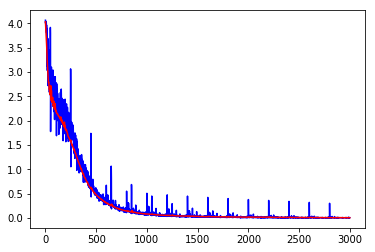

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(loss_track, 'b', vd_loss_track, 'r')
print('loss {:.4f} after {} examples (batch_size={})'.format(loss_track[-1], len(loss_track)*batch_size, batch_size))

In [22]:
# test on test data
# get the test batch
total_data_size = len(input_seqs) # 2791
train_val_data_size = max_batches * batch_size + vd_batch_size # 2200
# test_data = total_data - (training_data + validation_data)
test_input_seqs  = input_seqs[train_val_data_size:]
test_output_seqs = output_seqs[train_val_data_size:]

# sort the test data on len and observe on that
tiss = sorted(test_input_seqs, key=len)
toss = sorted(test_output_seqs, key=len)

# no. of batchess in test data
test_batches = len(test_input_seqs) / batch_size


In [23]:
test_loss_track_x = []
test_loss_track_y = []

for batch in range(int(test_batches)):
    fd = next_feed(batch, tiss, toss, batch_size)
    ll = len(fd[encoder_inputs])
    l = sess.run(loss, fd)
    test_loss_track_x.append(ll)
    test_loss_track_y.append(l)


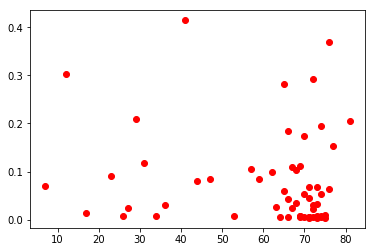

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(test_loss_track_x, test_loss_track_y, 'ro')